# 基础理论部分

0. Can you come up out 3 sceneraies which use AI methods?
 Driverless Cars, AI Assisted Cancer Detection, Smart Home Equipment

1. How do we use Github; Why do we use Jupyter and Pycharm;
Ans:(1)https://www.zhihu.com/question/20070065/answer/79557687
    (2)
       jupyter notebook 比较方便小项目
        在处理数据的时候，所有的中间结果不会被擦除，都显示在对应的cell下方，方便调试。
        既可以写代码，也可以用markdown做记录。
        有方便的图表展示。
       pycharm 比较方便大项目
        可以快速地在多个文件中切换。
        有很多快捷键
        有debug功能

2. What's the Probability Model?
概率模型是用来描述不同随机变量之间关系的模型。

3. Can you came up with some sceneraies at which we could use Probability Model?
推荐系统、抽奖、预测股票

4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?
    概率是我们用来处理不确定性的概念。如果一个事件可以有许多结果，而且我们不确定会发生哪个结果，那么我们可以使用概率来描述每个可能事件的可能性。典型的例子是掷硬币。有两种可能的结果：硬币可以正面或反面出现。既然我们不知道会发生什么，我们就说这两个事件都有可能发生。
    需要知道正则化的知识，了解结构。

5. What's the Language Model;
    语言模型用来估计句子的可能性，计算方法是 将句子分词，计算词语的在语料库中出现的概率或者联合概率，再根据概率计算句子的概率。
    假设有一个单词的集合{w}，由多个单词连接起来就组成了一个句子 $$ S=w_1w_2...w_n $$ 句子可长可短，一个语言模型就是这个语言里的句子的概率分布模型。

6. Can you came up with some sceneraies at which we could use Language Model? √
 问答系统、机器翻译、句法分析

7. What's the 1-gram language model;
    （1）N-gram 语言模型
        为了解决自由参数数目过多的问题，引入了马尔可夫假设：随意一个词出现的概率只与它前面出现的有限的n个词有关。基于上述假设的统计语言模型被称为N-gram语言模型。
    （2）1-gram 语言模型
        就是当n=1是的N-gram 语言模型，即一个词的出现与它周围的词是独立的，这种我们称为unigram，也就是一元语言模型。假设字符串中字符全部来自数量大小为V的词典，那么此时自由参数量级是词典大小V。

8. What's the disadvantages and advantages of 1-gram language model;
    优点：计算方法简单，模型简单，自由参数量级为词典大小。
    缺点：计算结果不够准确，一个字符串中字符与字符之间没有相互的影响，这是不符合实际情况中的分布的。

9. What't the 2-gram models;
    当n=2时，即一个词的出现仅与它前面的一个词有关时，这种我们称为bigram，叫二元语言模型，也叫一阶马尔科夫链，此时自由参数数量级是V^2。

# 编程实践部分
## 1. 设计你自己的句子生成器

In [251]:
rapper = '''
rapper = 人 动作 形容词 专业词汇 吗？
人 = 吴亦凡 | 我 | 你 | ta | 热狗 | 潘玮柏 
动作 = 有 | 会写 | 知道 
形容词 = 厉害的 | 牛批的 | 666的 | 优秀的 | 流畅的 | skrskr的 | null 
专业词汇 = freestyle | punchline | flow | 歌词 
'''

lyrics = '''
lyrics = 我 厂牌介绍 ， 动作 结束语
人称 = 你 | everybody | 哥们 | 兄弟 | 你们 | 朋友
厂牌介绍 = 来自 厂牌
厂牌 = GOSH | CDC | Walking Dead | C-BLOCK
动作 = 没听过 厂牌介绍 的 人称 | 不想给 人称 东西 | 喜欢吃 食物 | respect 人称 
食物 = 大碗宽面 | 兔头 | 豆汁 | 小龙虾 | 
东西 = 面子 | 食物 
结束语 = , skrskr! | , love&peace! | , bangbang! | ,666!
'''

In [83]:
def create_grammar(grammar_str, split = '=>', line_split='\n'): # 括号里等号右边 是默认值
    grammar = {}
    # 定义一个字典
    # key是 可以拓展的
    # value是 不能拓展的
    for line in grammar_str.split(line_split):
        if not line.strip(): continue  # 删除掉line前后的空格，如果为空，则继续读下一行
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]  # key 是 =>的左边，对应的value是=>的右边
    return grammar

In [84]:
import random

In [85]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target
    expanded = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n'else '\n' for e in expanded if e != 'null'])

In [265]:
def generate_n(n, gram, target):
    words = []
    for i in range(n):
        string = generate( gram, target)
        words.append(string)
    return words

In [266]:
# generate_n(gram=create_grammar(lyrics,split = '=', line_split='\n'), target='lyrics')
generate_n(10, create_grammar(lyrics, split = '='), target='lyrics')

['我来自GOSH，没听过来自WalkingDead的哥们,bangbang!',
 '我来自WalkingDead，respecteverybody,love&peace!',
 '我来自GOSH，respect朋友,666!',
 '我来自CDC，喜欢吃,skrskr!',
 '我来自C-BLOCK，respect哥们,skrskr!',
 '我来自GOSH，没听过来自C-BLOCK的哥们,love&peace!',
 '我来自CDC，喜欢吃兔头,skrskr!',
 '我来自WalkingDead，respect你,skrskr!',
 '我来自GOSH，没听过来自C-BLOCK的你们,bangbang!',
 '我来自CDC，不想给兄弟面子,bangbang!']

In [267]:
generate_n(10, create_grammar(rapper, split = '='), target='rapper')

['热狗有优秀的freestyle吗？',
 '潘玮柏会写厉害的freestyle吗？',
 '我有流畅的freestyle吗？',
 'ta有牛批的歌词吗？',
 '热狗有skrskr的flow吗？',
 '热狗知道厉害的freestyle吗？',
 '你知道优秀的punchline吗？',
 'ta有666的freestyle吗？',
 '你会写歌词吗？',
 '你有666的歌词吗？']

## 2. 使用新数据源完成语言模型的训练

In [120]:
from functools import reduce
from operator import add, mul
import pandas as pd 
import numpy as np
import jieba
from collections import Counter
import re 

In [109]:
filename = '../material/train.txt'

In [116]:
with open(filename, encoding='utf-8') as f:
    content = f.read()  # content 是一个长长的字符串

In [243]:
def token(string):  # 函数作用：将特殊符号去除，提取出词句
    return re.findall('\w+', string)

In [244]:
token(content)

['0',
 'disability',
 'insurance',
 '法律要求残疾保险吗',
 'Is',
 'Disability',
 'Insurance',
 'Required',
 'By',
 'Law',
 '1',
 'life',
 'insurance',
 '债权人可以在死后人寿保险吗',
 'Can',
 'Creditors',
 'Take',
 'Life',
 'Insurance',
 'After',
 'Death',
 '2',
 'renters',
 'insurance',
 '旅行者保险有租赁保险吗',
 'Does',
 'Travelers',
 'Insurance',
 'Have',
 'Renters',
 'Insurance',
 '3',
 'auto',
 'insurance',
 '我可以开一辆没有保险的新车吗',
 'Can',
 'I',
 'Drive',
 'A',
 'New',
 'Car',
 'Home',
 'Without',
 'Insurance',
 '4',
 'life',
 'insurance',
 '人寿保险的现金转出价值是否应纳税',
 'Is',
 'The',
 'Cash',
 'Surrender',
 'Value',
 'Of',
 'Life',
 'Insurance',
 'Taxable',
 '5',
 'annuities',
 '如何报告年金收入',
 'How',
 'Is',
 'Annuity',
 'Income',
 'Reported',
 '6',
 'home',
 'insurance',
 'AAA家庭保险涵盖什么',
 'What',
 'Does',
 'AAA',
 'Home',
 'Insurance',
 'Cover',
 '7',
 'retirement',
 'plans',
 '什么是简单的退休计划',
 'What',
 'Is',
 'A',
 'Simple',
 'Retirement',
 'Plan',
 '8',
 'disability',
 'insurance',
 '社会保险残疾保险是什么',
 'What',
 'Does',
 'Social',
 'Secu

In [141]:
def check_chinese(string):
    for ch in string:
        if u'\u4e00' <= ch <= u'\u9fff':
            return True
    return False
check_chinese('w')
# check_chinese('我')

False

In [162]:
def classify(content):  # 将英文词汇与中文词汇分类
    content_clean = {}
    content_e = []
    content_c = ''
    words = token(content)
    for i, word in enumerate(words):
        if check_chinese(word):
            content_c = content_c + word
        else:
            content_e.append(word)
    content_clean['Chinese'] = content_c
    content_clean['English'] = content_e
    return content_clean

In [163]:
content_classify = classify(content)

In [164]:
# with_jieba_cut = Counter(jieba.cut(content_classify['Chinese']))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 0.536 seconds.
Prefix dict has been built succesfully.


In [165]:
def cut(string): return list(jieba.cut(string))

In [177]:
TOKEN = cut(content_classify['Chinese'])
# len(TOKEN)
TOKEN = TOKEN + content_classify['English']  # 合并切好后的中文词汇与以空格切分英文词汇

In [193]:
words_count = Counter(TOKEN)
words_count.most_common(30) # 出现最多的前30名

[('insurance', 11842),
 ('Insurance', 10011),
 ('保险', 5005),
 ('Is', 3554),
 ('Life', 3359),
 ('life', 3353),
 ('Does', 3330),
 ('的', 3220),
 ('人寿保险', 2962),
 ('What', 2894),
 ('How', 2679),
 ('什么', 2677),
 ('A', 2599),
 ('吗', 2479),
 ('是', 2347),
 ('Can', 2125),
 ('我', 2056),
 ('是否', 1862),
 ('I', 1810),
 ('medicare', 1776),
 ('To', 1736),
 ('For', 1708),
 ('可以', 1704),
 ('auto', 1666),
 ('Medicare', 1632),
 ('health', 1551),
 ('Health', 1544),
 ('健康', 1513),
 ('Cover', 1378),
 ('home', 1347)]

In [203]:
frequences = [f for w,f in words_count.most_common()]
# frequences

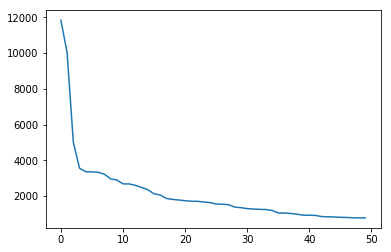

In [201]:
x = [i for i in range(len(frequences))]
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x[:50], frequences[:50])  # 之画出前50名词汇出现的次数
# 因为第一名与最后一名在y轴上相差太大了，画在一张图上很难看出曲线形状，要对坐标取Log

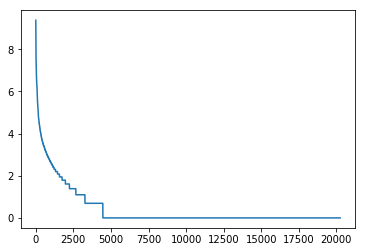

In [202]:
plt.plot(x, np.log(frequences))

In [204]:
def prob_1(word):
    return words_count[word]/ len(TOKEN)

In [205]:
prob_1('保险')

0.023786213976123488

In [230]:
prob_1('？')

0.0

In [207]:
TOKEN = [str(t) for t in TOKEN]

In [208]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [209]:
TOKEN_2_GRAM[:10]

['法律要求', '要求残疾', '残疾保险', '保险吗', '吗债权人', '债权人可以', '可以在', '在死', '死后', '后人寿保险']

In [210]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [278]:
def prob_2(gram_2, word1, word2):
    if word1 + word2 in words_count_2: 
        return words_count_2[word1+word2] / len(gram_2)
    else:
        return 1/len(gram_2)

In [279]:
prob_2(TOKEN_2_GRAM, '保险', '法律')

9.505070955354681e-06

In [280]:
cc = cut('how do you do?')
cc = [x for x in cc if x.strip() != '']
cc

['how', 'do', 'you', 'do', '?']

In [281]:
def get_probability(gram_2, sentence):
    words = cut(sentence)  # 把一整句话切词，要注意英语句子
    words = [x for x in words if x.strip() != '']  # 去掉英语句子中的空字符
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(gram_2, word, next_)
        
        sentence_pro *= probability

    return sentence_pro

In [282]:
get_probability(TOKEN_2_GRAM,'How  Is  Annuity  Income  Reported')

1.1937608383536463e-18

In [283]:
get_probability(TOKEN_2_GRAM,'我要购买保险')

6.775978039974537e-11

## 3. 获得最优质的语言

In [258]:
people = '''
people = 主语 动作 专业词汇
主语 = 吴亦凡 | 我 | 你 | 他 | 汽车 | 潘玮柏 
动作 = 买 | 推销 | 退出 | 提交 | 获得 | 注册 | 得到
专业词汇 = 保险 |  报告 | 赔偿 
'''

In [269]:
generate_n(20, create_grammar(people, split = '='), target='people')

['潘玮柏推销赔偿',
 '汽车退出报告',
 '我获得保险',
 '他买报告',
 '吴亦凡买保险',
 '我买赔偿',
 '他推销报告',
 '汽车得到保险',
 '吴亦凡推销保险',
 '潘玮柏提交报告',
 '潘玮柏买保险',
 '潘玮柏退出报告',
 '你退出赔偿',
 '他退出报告',
 '他获得赔偿',
 '潘玮柏得到赔偿',
 '你推销保险',
 '潘玮柏买赔偿',
 '我买赔偿',
 '汽车得到报告']

In [308]:
def generate_best(gram, lan_model):
    pro = []
    for i, word in enumerate(lan_model):
        pro.append((i,get_probability(gram, word)))
    pro = sorted(pro, key = lambda x:x[1])
    
    index = pro[0][0]
    return lan_model[index]
#     return pro

In [315]:
generate_best(TOKEN_2_GRAM,generate_n(20, create_grammar(people, split = '='), target='people') )

'你推销保险'